<a href="https://colab.research.google.com/github/ugrasegehan/IE423/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

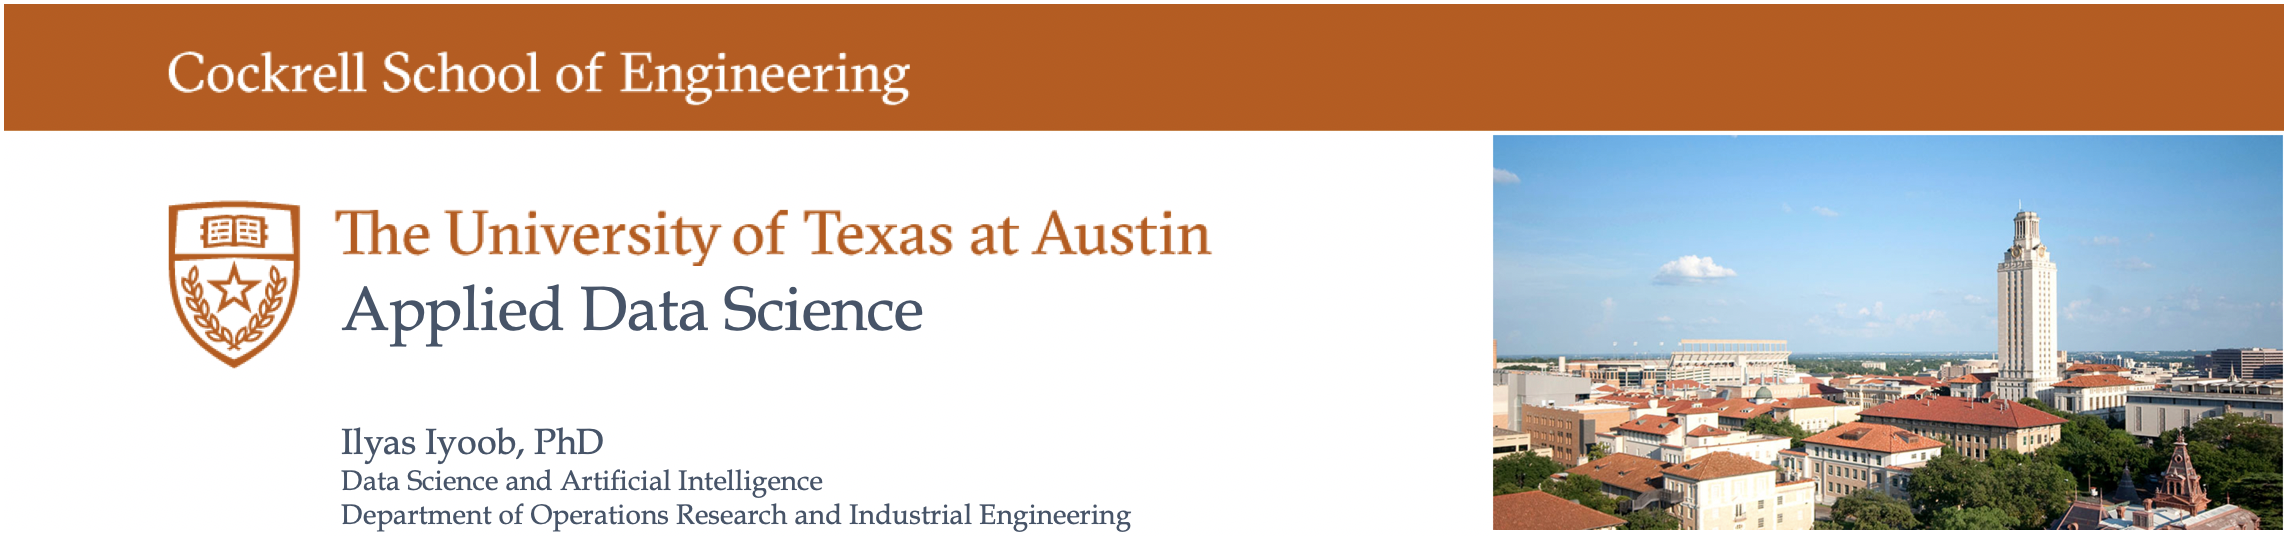

IE 423 Task 5

Egehan Uğraş
22003278

# Fashion Mnist
## Can you classify images of clothes

## Initialize

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
dfFashion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/task5/mnist_fashion_train.csv')
dfFashion.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfFashion.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [14]:
# Define target and features

y = dfFashion['label'].ravel()
X = scale(dfFashion.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=19)

In [ ]:
def plot_label_distribution(y):
    sns.countplot(y)
    plt.title('Distribution of Labels')
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.show()

plot_label_distribution(y)

## Analyze Data

Cloth Image 				 Label
AxesImage(size=(28, 28)) 		 9


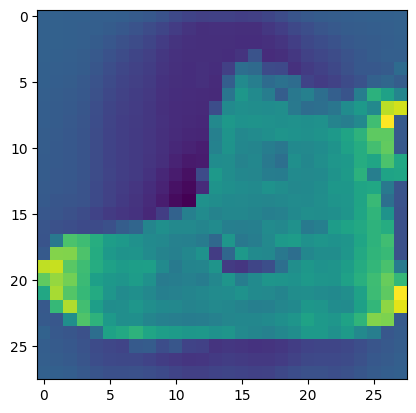

In [15]:
# Display first image
print('Cloth Image', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

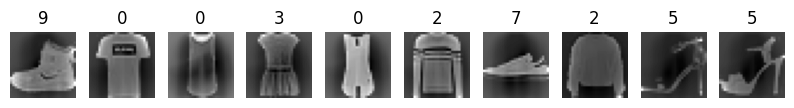

In [16]:
# Let me draw first 10 pictures of dataset
def plot_first_10_images(X, y):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(y[i])
        plt.axis('off')
    plt.show()

plot_first_10_images(X, y)

In [20]:
#Let me also apply linear regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Training a simple logistic regression model
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1230
           1       0.97      0.96      0.97      1173
           2       0.76      0.73      0.74      1257
           3       0.84      0.87      0.85      1207
           4       0.72      0.78      0.75      1147
           5       0.92      0.92      0.92      1179
           6       0.62      0.58      0.60      1191
           7       0.90      0.91      0.91      1221
           8       0.94      0.93      0.93      1189
           9       0.93      0.93      0.93      1206

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000

Confusion Matrix:
[[ 985    7   22   53    8    4  126    1   19    5]
 [   1 1125    4   34    2    0    3    2    1    1]
 [  21    3  922   13  167    4  117    1    9    0]
 [  49   13   16 1049   32    0   40    0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


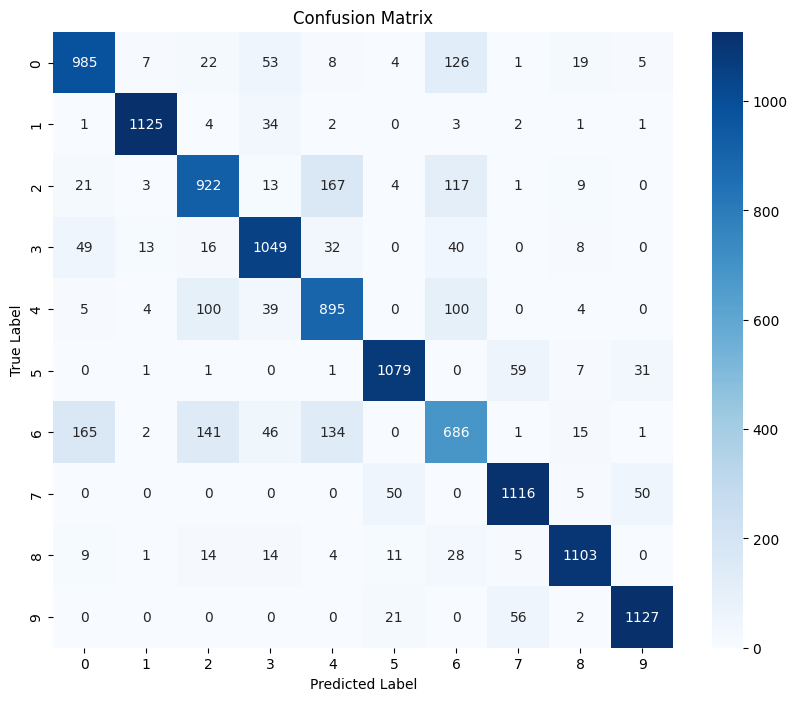

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


## Predicting Class of Image

In [19]:
# Checking for missing values
missing_values = dfFashion.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
%%time

# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

mdlSvmFashion = SVC()
mdlSvmFashion.fit(X_train, y_train)
y_test_pred = mdlSvmFashion.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1230
           1       1.00      0.97      0.98      1173
           2       0.83      0.83      0.83      1257
           3       0.87      0.93      0.90      1207
           4       0.80      0.84      0.82      1147
           5       0.97      0.95      0.96      1179
           6       0.74      0.65      0.69      1191
           7       0.93      0.95      0.94      1221
           8       0.95      0.98      0.96      1189
           9       0.96      0.95      0.95      1206

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 9min 5s, sys: 688 ms, total: 9min 6s
Wall time: 9min 20s


While Support Vector Machines create a boundary that maximize the margin between the different classes, it takes a very long time, as we can see it took almost 10 minutes to compute.  Let's attempt a different way of solving this perhaps by mimicing the way we classify images in our brain.

### Neural Network

Neural Network libraries are efficient in solving for these weights and biases in large matrices, but they are not very explainable unless you define the layers in a meaningful manner.

In [18]:
%%time

# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncFashion = MLPClassifier()
mdlNncFashion.fit(X_train, y_train)
y_test_pred = mdlNncFashion.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1230
           1       0.98      0.97      0.98      1173
           2       0.82      0.80      0.81      1257
           3       0.88      0.90      0.89      1207
           4       0.79      0.81      0.80      1147
           5       0.96      0.96      0.96      1179
           6       0.71      0.71      0.71      1191
           7       0.93      0.94      0.93      1221
           8       0.96      0.97      0.96      1189
           9       0.95      0.94      0.95      1206

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

CPU times: user 3min 6s, sys: 1min 6s, total: 4min 12s
Wall time: 2min 32s


Neural network takes less time to compute while almost gets approximate accuracy results.

In [21]:
# Load Data for Scoring
X_score = scale(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/task5/mnist_fashion_test.csv'))

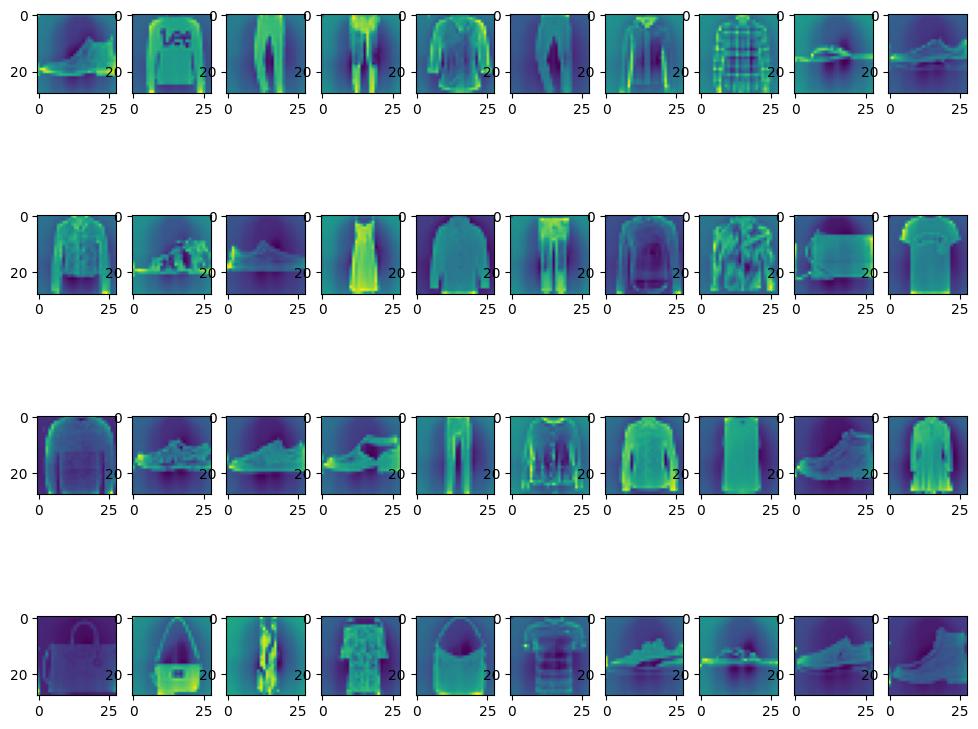

In [23]:
# View test clothes
plt.figure(figsize=(12,10))
col, row = 10, 4
for i in range(col*row):
    plt.subplot(row, col, i+1)
    plt.imshow(X_score[i][:784].reshape((28,28))) # Selecting the first 784 elements for reshaping
plt.show()

In [27]:
# Show classified clothes
print('Predicted Clothes (Neural Network):')
for i in range(col*row):
    if np.mod(i,col) == 0:
        print('\n')
    print(mdlNncFashion.predict(X_score[i,:784].reshape(1,-1))[0], end=' ')

Predicted Clothes (Neural Network):


9 6 1 1 2 1 2 6 5 7 

4 5 7 3 4 3 0 4 8 0 

0 7 7 9 1 2 2 0 9 3 

8 8 1 3 8 0 7 5 7 9 

Let's see if this result can be further improved by tweaking the network...

utexas_ds_orie_divider_gray.png

In [28]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
mdlDncFashion = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncFashion.fit(X_train, y_train)
y_test_pred = mdlDncFashion.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1230
           1       0.99      0.97      0.98      1173
           2       0.83      0.79      0.81      1257
           3       0.88      0.92      0.90      1207
           4       0.83      0.80      0.81      1147
           5       0.96      0.97      0.96      1179
           6       0.69      0.72      0.70      1191
           7       0.93      0.94      0.93      1221
           8       0.97      0.96      0.97      1189
           9       0.96      0.94      0.95      1206

    accuracy                           0.88     12000
   macro avg       0.89      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

CPU times: user 2min 30s, sys: 58 s, total: 3min 28s
Wall time: 2min 6s


### Cross Validation

In addition to the typical train/test split, it helps to run multiple experiments in which the train/test data is different.  Suppose the data is being split train-80%/test-20%, then there are 5 different experiments that can be run in which each data point is part of the test set at least once.  So, let's break up the data into multiple train/test splits and **cross-validate** across all to make sure the model works well.

In [29]:
# Cross-validate model across 5 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(mdlDncFashion, X, y, cv=5)

array([0.88491667, 0.8795    , 0.89358333, 0.88783333, 0.8845    ])

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4533 - accuracy: 0.8367 - val_loss: 0.3979 - val_accuracy: 0.8538
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3379 - accuracy: 0.8757 - val_loss: 0.3416 - val_accuracy: 0.8718
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2997 - accuracy: 0.8888 - val_loss: 0.3441 - val_accuracy: 0.8733
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2748 - accuracy: 0.8983 - val_loss: 0.3365 - val_accuracy: 0.8792
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2496 - accuracy: 0.9058 - val_loss: 0.3514 - val_accuracy: 0.8767
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2329 - accuracy: 0.9131 - val_loss: 0.3446 - val_accuracy: 0.8791
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2176 - accuracy: 0.9183 - val_loss: 0.3429 - val_accuracy:

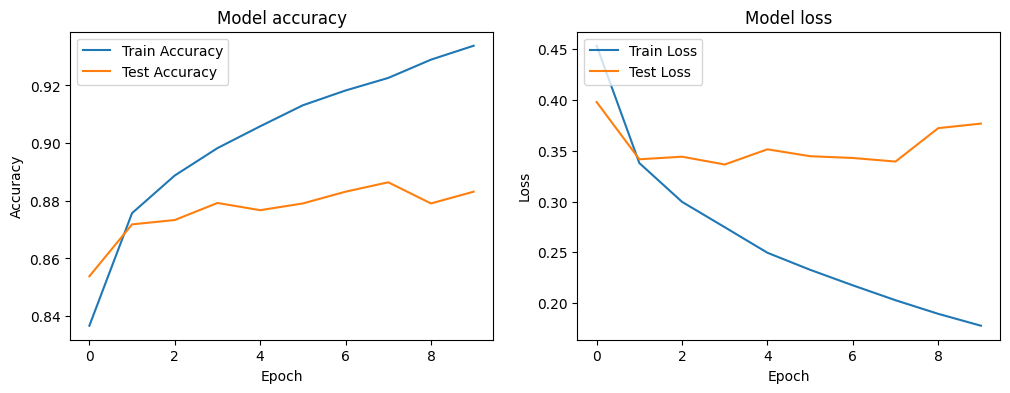

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train.reshape(-1, 28, 28), y_train_cat, validation_data=(X_test.reshape(-1, 28, 28), y_test_cat), epochs=10, batch_size=32)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

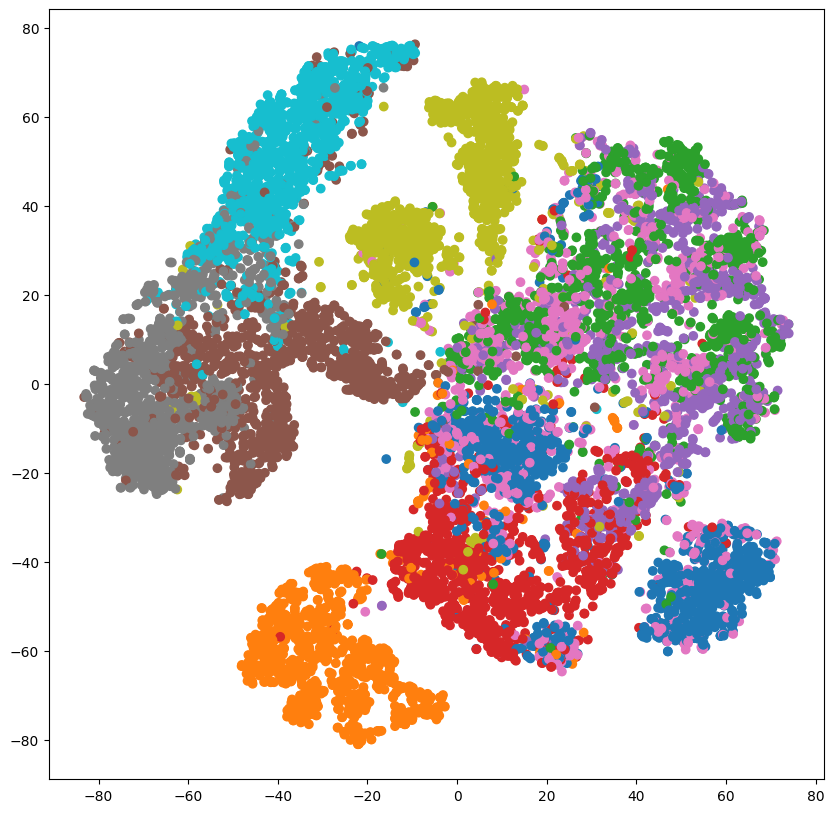

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=19)
X_tsne = tsne.fit_transform(X_test)

def plot_tsne(X, y):
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
    handles, labels = scatter.legend_elements()
    plt.legend(handles=handles, labels=np.unique(y))
    plt.title('t-SNE Embedding of Fashion MNIST')
    plt.show()
plot_tsne(X_tsne, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


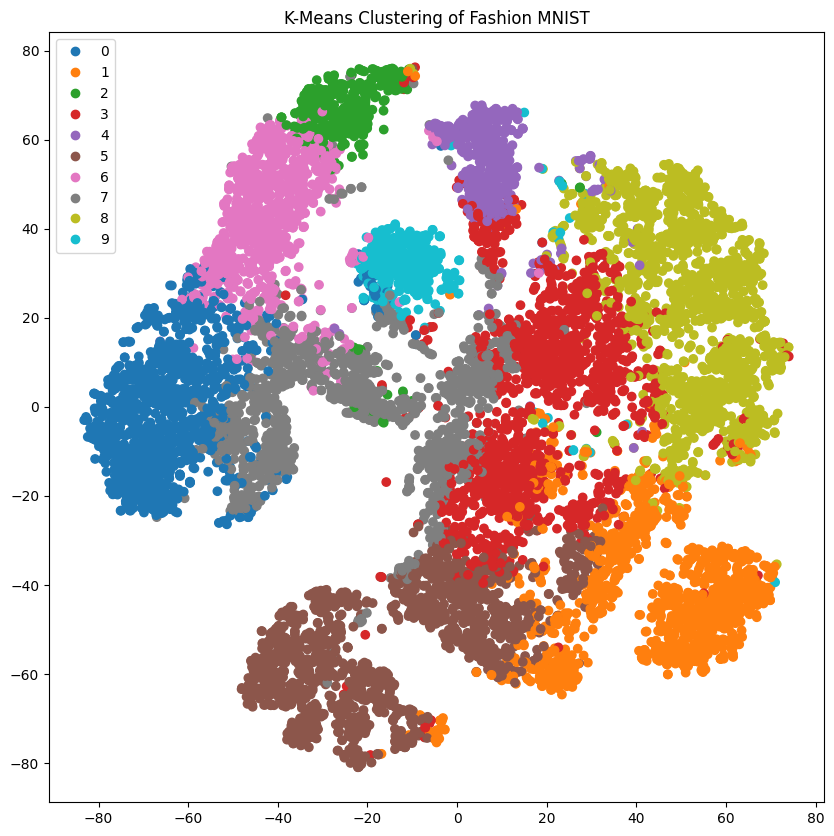

In [36]:
# Let's make K-Means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=19)
X_kmeans = kmeans.fit_predict(X_test)

X_tsne_kmeans = tsne.fit_transform(X_test)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_tsne_kmeans[:, 0], X_tsne_kmeans[:, 1], c=X_kmeans, cmap='tab10')
plt.legend(handles=scatter.legend_elements()[0], labels=range(10))
plt.title('K-Means Clustering of Fashion MNIST')
plt.show()


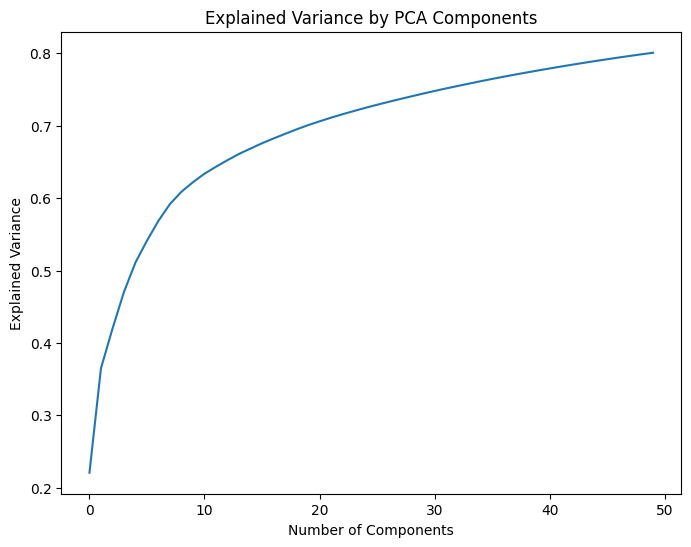

In [37]:
# Let's check the PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()


## Takeaways

* Solved a complex visual recognition problem faster by leveraging *Neural Networks*
* Improved the solution by adding additional layers into the Neural Network model known as *Deep Neural Networks*
* Evaluated the model across multiple experiments via *Cross-Validation*

utexas_ds_orie_divider_gray.png